# Reading data from csv to pandas data frame

In [506]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("titanic.csv")
df.head(10)
df.sort_values(by='Age').head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
799,1,3,Master. Assad Alexander Thomas,male,0.42,0,1,8.5167
751,1,2,Master. Viljo Hamalainen,male,0.67,1,1,14.5000
641,1,3,Miss. Eugenie Baclini,female,0.75,2,1,19.2583
466,1,3,Miss. Helene Barbara Baclini,female,0.75,2,1,19.2583
827,1,2,Master. George Sibley Richards,male,0.83,1,1,18.7500
77,1,2,Master. Alden Gates Caldwell,male,0.83,0,2,29.0000
303,1,1,Master. Hudson Trevor Allison,male,0.92,1,2,151.5500
823,1,2,Master. Andre Mallet,male,1.00,0,2,37.0042
171,1,3,Miss. Eleanor Ileen Johnson,female,1.00,1,1,11.1333
379,1,3,Miss. Maria Nakid,female,1.00,0,2,15.7417


In [507]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


# Trying to inspect different fields of data 

1. See if the Age data is correct and within the limits (0,maxAge] => 0 < Age <= max age on titanic

In [508]:
minAge = df['Age'].min()
maxAge = df['Age'].max()
print("min_age =", minAge, "max_age =", maxAge)

min_age = 0.42 max_age = 80.0


2. See if the Fare is not negative by determining the min and max values

In [509]:
minFare = df['Fare'].min()
maxFare = df['Fare'].max()
print("min_fare =", minFare, "max_fare =", maxFare)

min_fare = 0.0 max_fare = 512.3292


3. See how the data is distributed across Pclass.

In [510]:
df['Pclass'].value_counts()

3    487
1    216
2    184
Name: Pclass, dtype: int64

In [511]:
total_count = df['Pclass'].count()
Pclass = df['Pclass'].value_counts(normalize=True).reset_index(name="class_per")
Pclass.rename(columns = {'index':'Pclass'})

,Pclass,class_per
0,3,0.549042
1,1,0.243517
2,2,0.207441


55% of the people are in Pclass 3, 24% in Pclass 1 and 21% in Pclass 2.
4. See how many are males and females

In [285]:
df['Sex'].value_counts()

male      573
female    314
Name: Sex, dtype: int64

Males are more than females
5. See how many survived out of total

In [281]:
df['Survived'].value_counts()
#Total survived are less compared to dead

0    545
1    342
Name: Survived, dtype: int64

6. See the distribution of fares 

In [262]:
df['Fare'].value_counts()
#Count of people by Fares

8.0500     43
13.0000    42
7.8958     36
7.7500     33
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

# Relation between Age and Pclass

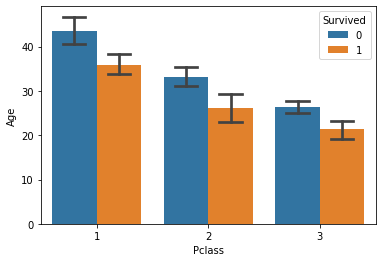

In [444]:
sns.barplot(x = 'Pclass', y = 'Age',hue = 'Survived', data = df, capsize = 0.2)

Median age of survived people is less than median age of not survived in every Pclass. 

# Relation between Age, Fare, Sex and Survived

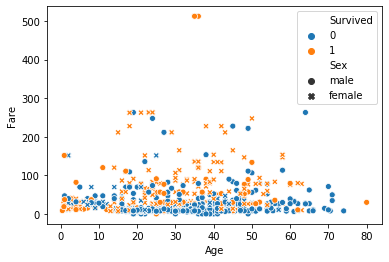

In [394]:
sns.scatterplot(x="Age", y="Fare", style = "Sex", hue = "Survived", data=df)

We can see that more people who survived are in higher fare range and most of them are females

# Relation between Fare and Survived

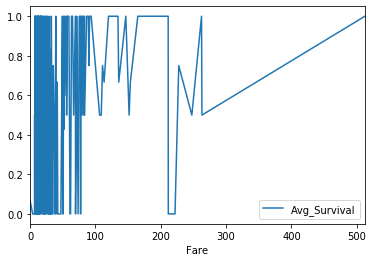

In [514]:
SurvivorsByFare = df[['Fare','Survived','Sex']]
temp = SurvivorsByFare.groupby(['Fare','Survived'])['Sex'].count().reset_index(name="count")
temp
x = SurvivorsByFare.groupby('Fare')['Survived'].mean().reset_index(name="Avg_Survival")
x['Fare'].corr(x['Avg_Survival'])
x.plot(x = 'Fare', y = 'Avg_Survival')

Based on the above graph there is no positive correlation between Survived and Fare without creating Fare ranges

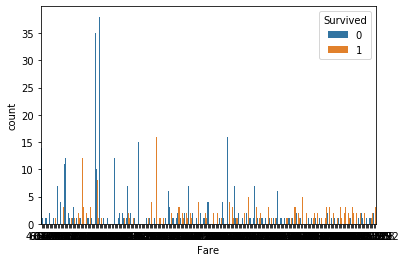

In [490]:
sns.countplot(x = 'Fare', hue = 'Survived', data = df)

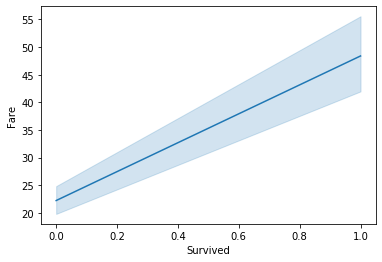

In [491]:
sns.lineplot(x = 'Survived', y = 'Fare', data = Survivors)

From the above two graphs we can see that people with higher fare survived more than lower fare but not clear enough. As the range of Fares is relatively high, inorder to plot clearer graphs, I will try to find the relationship between Fare and Pclass so that I can group the Fares by Pclass and find the relation between Pclass and Survived which inturn gives the relation between Fare and Survived.

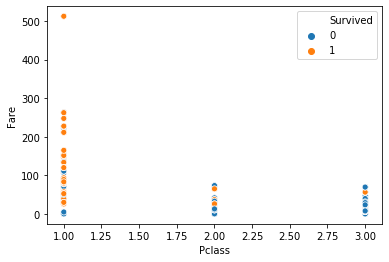

In [470]:
sns.scatterplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = df)

Fare ranges are scattered from 0 to max in each Pclass, but we can clearly see that most of the people with higher Fares survived in each Pclass than those with lower Fare. 

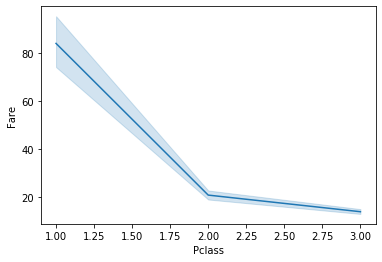

In [263]:
sns.lineplot(x = 'Pclass', y = 'Fare', data = df)

This graph shows that highest median of Fare is in Pclass 1 and least median is Pclass 3 which says most of Pclass 1 have highr Fare and Pclass 3 have lower Fare.

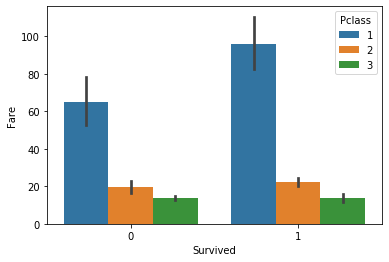

In [456]:
sns.barplot(x = 'Survived', y = 'Fare', hue = 'Pclass', data = df)

This graph clearly shows that as the Fare price increases, the probability to survive also increases. So, Pclass 1 with higher fare prices has more probability to survive than Pclass 3

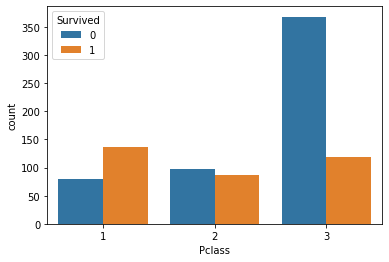

In [266]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = df)

More people survived in Pclass 1 than Pclass 3 and the percentage of people survived in Pclass 1 is highest. This implies that higher fare people survived more than lower fare.

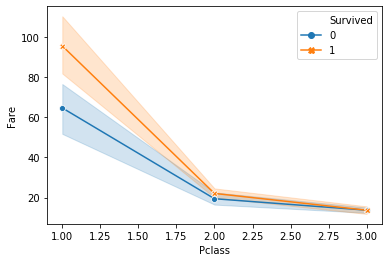

In [386]:
sns.lineplot(x = 'Pclass', y = 'Fare', hue = 'Survived', style = 'Survived', markers=True, dashes=False, data = df)

The above graph shows that higher fares belong to Pclass 1 passengers and people with higher fare survived more compared to lower fare

In [492]:
Survivors = df[['Pclass','Survived','Fare']]
Survivors.groupby('Pclass').mean()
#Trying to find the survival rate by Pclass

,Survived,Fare
Pclass,,
1,0.629630,84.154687
2,0.472826,20.662183
3,0.244353,13.707707


Average survivors are more for Pclass 1 with highest average Fare followed by Pclass 2 and Pclass 3

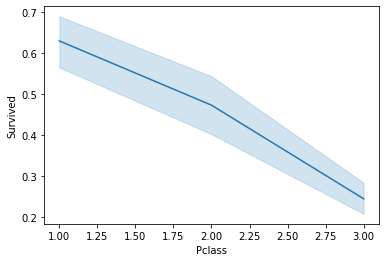

In [457]:
sns.lineplot(x = 'Pclass', y = 'Survived', data = Survivors)

As we can see in this lineplot, the survival rate is decreasing as we go from Pclass 1 to Pclass 3. 

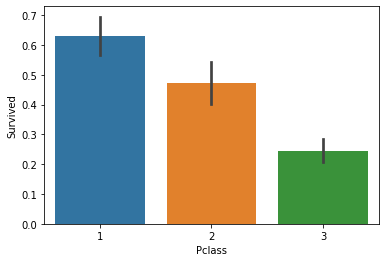

In [390]:
sns.barplot(x = 'Pclass', y = 'Survived', data = Survivors)

This graph shows the minimum, maximum and average survival rate based on Pclass and we can clearly see that the Survival rate is low for Pclass 3

Below, I'm trying to see the statistics of Survived and Dead individually

In [272]:
Survived = df[['Pclass','Survived','Fare']].query("Survived=='1'")
Survived.describe()

,Pclass,Survived,Fare
count,342.000000,342.0,342.000000
mean,1.950292,1.0,48.395408
std,0.863321,0.0,66.596998
min,1.000000,1.0,0.000000
25%,1.000000,1.0,12.475000
50%,2.000000,1.0,26.000000
75%,3.000000,1.0,57.000000
max,3.000000,1.0,512.329200


In [487]:
Survived.groupby('Pclass').mean()

,Survived,Fare
Pclass,,
1,1,95.608029
2,1,22.055700
3,1,13.694887


Average Fare among the survivors is more for Pclass 1 and least for Pclass 3

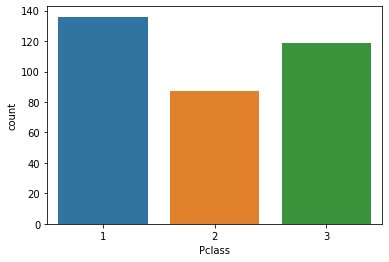

In [486]:
sns.countplot(x = 'Pclass', data = Survived)

Number of Pclass 1 people survived is maximum, followed by 3 and 2 even though the average Fare of Pclass 2 is higher than Pclass 3.

Now let's examine the stats for people who did not survive

In [480]:
NotSurvived = df[['Pclass','Survived','Fare']].query("Survived=='0'")
NotSurvived.describe()

,Pclass,Survived,Fare
count,545.000000,545.0,545.000000
mean,2.528440,0.0,22.208584
std,0.737405,0.0,31.484153
min,1.000000,0.0,0.000000
25%,2.000000,0.0,7.854200
50%,3.000000,0.0,10.500000
75%,3.000000,0.0,26.000000
max,3.000000,0.0,263.000000


In [481]:
NotSurvived.groupby('Pclass').mean()

,Survived,Fare
Pclass,,
1,0,64.684008
2,0,19.412328
3,0,13.711853


Average Fare of dead is less than survivors for class 1 and 2 except for class 3.

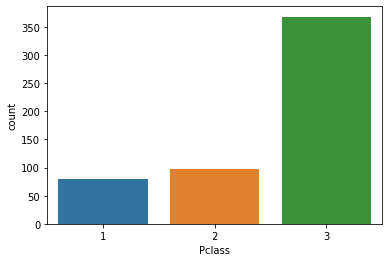

In [485]:
sns.countplot(x = 'Pclass', data = NotSurvived)

Number of Pclass 3 people not survived is maximum, followed by 2 and 1 which again says people with higher fare had better chances to survive.

# Conclusion

People in Titanic belonged to 3 classes based on Fare price. Average Fare prices were highest for Pclass 1 followed by 2 and 3. If we see the count of people survived in each Pclass, survival rate was more for Pclass 1 followed by 2 and 3. This tells that people with higher fare had more probability to survive than those with lower fare on Titanic. 